In [2]:
import prophet
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error
import numpy as np
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import loguniform



import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit

In [3]:
import time
start_time = time.time()

df = pd.read_csv("../Dataset/dataset-penduduk.csv")
print("Preview Dataset : ")
df.head(10)


Preview Dataset : 


,No,Tahun,Total,Laju Pertumbuhan,Kemiskinan,TFR,Angka Harapan Hidup
0,1,1961,97387000,2.1,58432200.0,6.64,47.30
1,2,1962,99257000,2.1,59554200.0,6.54,48.10
2,3,1963,101221000,2.1,60732600.0,6.44,48.70
3,4,1964,103271000,2.1,61962600.0,6.33,49.40
4,5,1965,105414000,2.1,63248400.0,6.23,42.76
5,6,1966,107645000,2.1,64587000.0,6.13,48.40
6,7,1967,109964000,2.1,65978400.0,6.02,51.30
7,8,1968,112377000,2.1,67426200.0,5.92,51.80
8,9,1969,114880000,2.1,68928000.0,5.82,52.58
9,10,1970,117469000,2.1,70000000.0,5.71,53.25


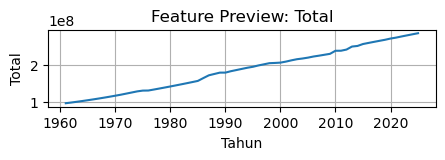

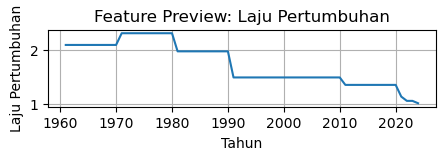

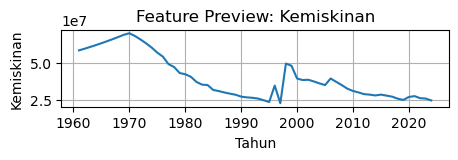

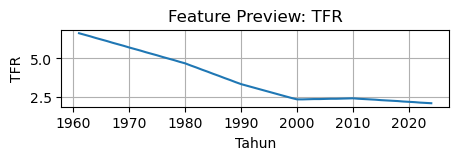

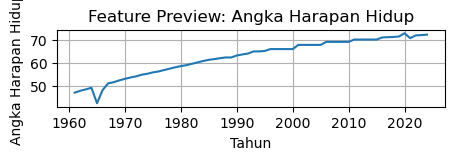

In [4]:
for column in df.columns:
    if column != 'Tahun'    and column != 'No':
        plt.figure(figsize=(5, 1))
        plt.plot(df['Tahun'], df[column])
        plt.title(f'Feature Preview: {column}')
        plt.xlabel('Tahun')
        plt.ylabel(column)
        plt.grid(True)
        plt.show()



In [5]:
print("Total nilai kosong : ")
print(df.isnull().sum())

print("\nNilai duplikat : ",df.duplicated().sum())

df = df.dropna()


Total nilai kosong : 
No                     0
Tahun                  0
Total                  0
Laju Pertumbuhan       1
Kemiskinan             1
TFR                    1
Angka Harapan Hidup    1
dtype: int64

Nilai duplikat :  0


In [6]:
print("Tipe Data : ")
print(df.dtypes)

Tipe Data : 
No                       int64
Tahun                    int64
Total                    int64
Laju Pertumbuhan       float64
Kemiskinan             float64
TFR                    float64
Angka Harapan Hidup    float64
dtype: object


In [7]:
#Split data train-test
n = len(df)
train_size = int(n * 0.85)

In [8]:

# 'No', 'Tahun', 'Total', 'Laju Pertumbuhan', 'Kemiskinan', 'TFR', 'Angka Harapan Hidup', 'Total_Lag_1'
x = (df.drop(columns=['No', 'Tahun', 'Total'])).values
y = df['Total'].values


In [9]:
y

array([ 97387000,  99257000, 101221000, 103271000, 105414000, 107645000,
       109964000, 112377000, 114880000, 117469000, 120149000, 123115000,
       126088000, 129083000, 131110000, 131304000, 133940000, 136639000,
       139376000, 142178000, 145038000, 147939700, 150900800, 153923700,
       157009500, 164629618, 172009500, 175588836, 179136110, 179194358,
       182940900, 186042100, 189135600, 192216500, 194754800, 198342900,
       201353100, 204392500, 205017000, 205843000, 208601000, 212003000,
       214975000, 216854000, 219205000, 222192000, 224428200, 226889000,
       229349800, 237556400, 237652600, 240763092, 248818100, 250421446,
       255587500, 258496500, 261355500, 264161600, 266911900, 270203900,
       272682500, 275773800, 278696200, 281603800], dtype=int64)

In [10]:
df

,No,Tahun,Total,Laju Pertumbuhan,Kemiskinan,TFR,Angka Harapan Hidup
0,1,1961,97387000,2.100,58432200.0,6.64,47.30
1,2,1962,99257000,2.100,59554200.0,6.54,48.10
2,3,1963,101221000,2.100,60732600.0,6.44,48.70
3,4,1964,103271000,2.100,61962600.0,6.33,49.40
4,5,1965,105414000,2.100,63248400.0,6.23,42.76
...,...,...,...,...,...,...,...
59,60,2020,270203900,1.350,26986855.0,2.18,72.81
60,61,2021,272682500,1.130,27542770.0,2.16,70.70
61,62,2022,275773800,1.050,26161160.0,2.13,71.88
62,63,2023,278696200,1.050,25898550.0,2.11,72.00


In [11]:
# Ganti list ini dengan nama kolom fitur Anda yang sebenarnya
nama_kolom_fitur = ['Laju Pertumbuhan', 'Kemiskinan','TFR','Angka Harapan Hidup']

# Gabungkan fitur yang sudah di-scaling dengan target untuk analisis
df_analisis = pd.DataFrame(x, columns=nama_kolom_fitur)
df_analisis['target_residu'] = y

# Hitung dan tampilkan korelasi
korelasi = df_analisis.corr()

# print("\nKorelasi Fitur dengan Target:")
print(korelasi['target_residu'])

Laju Pertumbuhan      -0.924280
Kemiskinan            -0.803164
TFR                   -0.947889
Angka Harapan Hidup    0.962359
target_residu          1.000000
Name: target_residu, dtype: float64


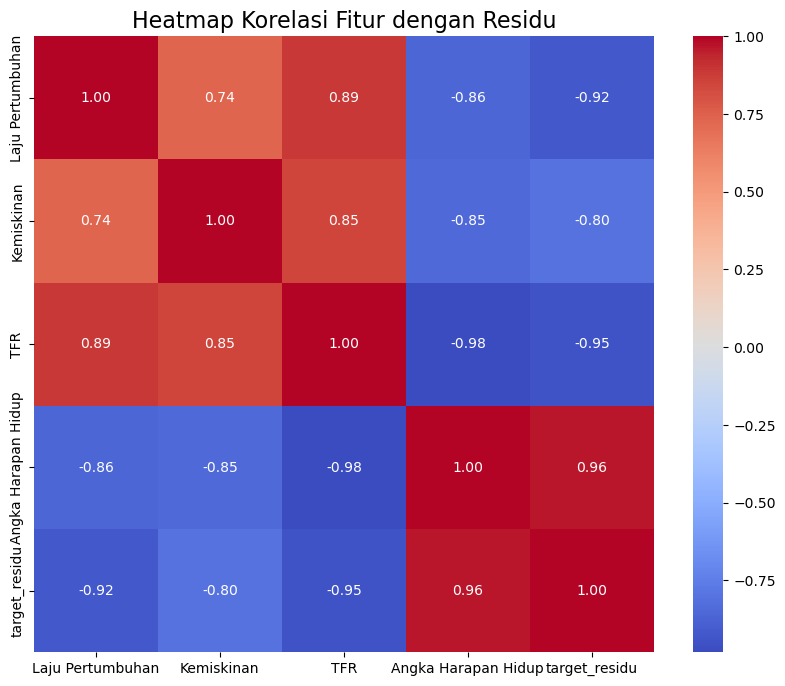

In [12]:
import seaborn as sns
# 1. Siapkan kanvas untuk plot (opsional, untuk mengatur ukuran)
plt.figure(figsize=(10, 8))

# 2. Buat heatmap menggunakan seaborn
sns.heatmap(
    korelasi,
    annot=True,      # Menampilkan angka korelasi di setiap sel
    cmap='coolwarm', # Menggunakan skema warna biru-merah (negatif-positif)
    fmt=".2f"        # Memformat angka menjadi 2 desimal
)

# 3. Tambahkan judul
plt.title('Heatmap Korelasi Fitur dengan Residu', fontsize=16)

# 4. Tampilkan plot
plt.show()

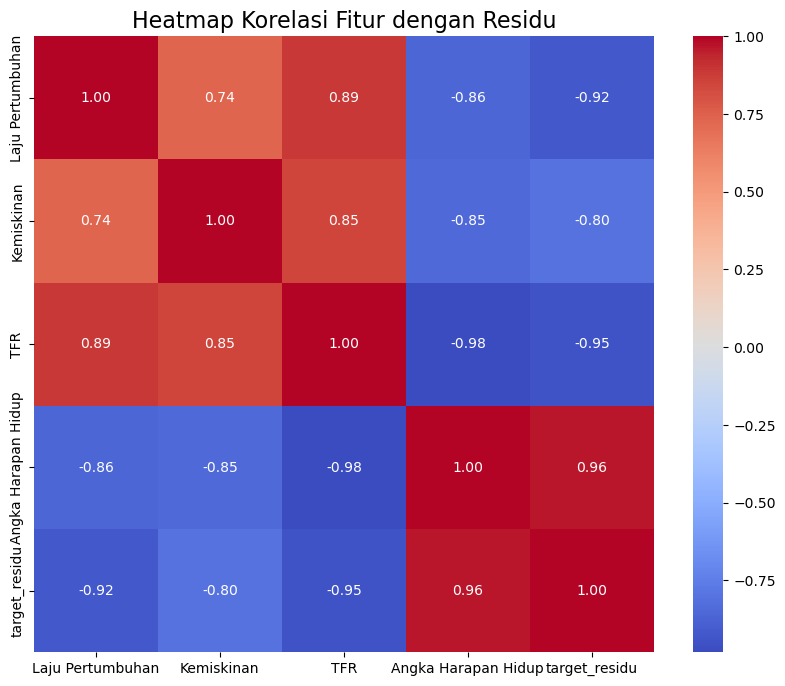

In [13]:

df_analisis = pd.DataFrame(x, columns=nama_kolom_fitur)
df_analisis['target_residu'] = y

korelasi = df_analisis.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    korelasi,
    annot=True, 
    cmap='coolwarm', 
    fmt=".2f"        
)
plt.title('Heatmap Korelasi Fitur dengan Residu', fontsize=16)
plt.show()

In [14]:
# #Split Data


X_train = x[:train_size]
X_test = x[train_size:]

y_train = y[:train_size]
y_test = y[train_size:]


In [15]:
X_train

array([[2.1000000e+00, 5.8432200e+07, 6.6400000e+00, 4.7300000e+01],
       [2.1000000e+00, 5.9554200e+07, 6.5400000e+00, 4.8100000e+01],
       [2.1000000e+00, 6.0732600e+07, 6.4400000e+00, 4.8700000e+01],
       [2.1000000e+00, 6.1962600e+07, 6.3300000e+00, 4.9400000e+01],
       [2.1000000e+00, 6.3248400e+07, 6.2300000e+00, 4.2760000e+01],
       [2.1000000e+00, 6.4587000e+07, 6.1300000e+00, 4.8400000e+01],
       [2.1000000e+00, 6.5978400e+07, 6.0200000e+00, 5.1300000e+01],
       [2.1000000e+00, 6.7426200e+07, 5.9200000e+00, 5.1800000e+01],
       [2.1000000e+00, 6.8928000e+07, 5.8200000e+00, 5.2580000e+01],
       [2.1000000e+00, 7.0000000e+07, 5.7100000e+00, 5.3250000e+01],
       [2.3200000e+00, 6.8124483e+07, 5.6100000e+00, 5.3800000e+01],
       [2.3200000e+00, 6.5743410e+07, 5.5100000e+00, 5.4300000e+01],
       [2.3200000e+00, 6.3170088e+07, 5.4000000e+00, 5.5000000e+01],
       [2.3200000e+00, 6.0281761e+07, 5.3000000e+00, 5.5400000e+01],
       [2.3200000e+00, 5.6901740e+

In [ ]:

# 3. GUNAKAN KEMBALI HYPERPARAMETER TUNING PADA DATA YANG SUDAH DI-SCALING
param_distributions = {
    'C': loguniform(0.1, 100),
    'gamma': ('scale', 'auto'), 
    'epsilon': [0.1, 0.5, 100],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}
tscv = TimeSeriesSplit(n_splits=3)

random_search = RandomizedSearchCV(
    estimator=SVR(),
    param_distributions=param_distributions,
    n_iter=100,
    cv=tscv,
    scoring='neg_mean_squared_error'
)

# Latih pencarian pada data training yang SUDAH di-scaling
random_search.fit(X_train, y_train)

# 4. AMBIL MODEL TERBAIK DAN LAKUKAN PREDIKSI
print("Parameter terbaik ditemukan:", random_search.best_params_)
best_svr_model = random_search.best_estimator_

# Gunakan model terbaik untuk prediksi
residual_pred = best_svr_model.predict(X_test)

# Sekarang hasilnya akan bervariasi
print("\nPrediksi Residu (setelah menggunakan model terbaik):")
print(residual_pred)

In [ ]:
param_distributions

{'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x1cdbc05fc10>,
 'gamma': ('scale', 'auto'),
 'epsilon': [0.1, 0.5, 100],
 'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

In [ ]:
residual_pred

array([0.55108651, 0.54605651, 0.55240867, 0.55802802, 0.56431318,
       0.5679969 , 0.59290166, 0.59737801, 0.59943313, 0.60218046,
       0.60235428, 0.61095999, 0.61484216, 0.62050373, 0.62593537,
       0.62985644, 0.63923448, 0.66059552, 0.66328316, 0.6739604 ])

In [ ]:
y_test
y_true = y_test

In [ ]:
y_pred = residual_pred
y_pred

array([0.55108651, 0.54605651, 0.55240867, 0.55802802, 0.56431318,
       0.5679969 , 0.59290166, 0.59737801, 0.59943313, 0.60218046,
       0.60235428, 0.61095999, 0.61484216, 0.62050373, 0.62593537,
       0.62985644, 0.63923448, 0.66059552, 0.66328316, 0.6739604 ])

In [ ]:
y_true

array([0.66127519, 0.67748978, 0.68962874, 0.70298692, 0.71634509,
       0.76089369, 0.7614159 , 0.77830085, 0.82202655, 0.83073013,
       0.85877347, 0.87456464, 0.8900844 , 0.905317  , 0.92024669,
       0.93811694, 0.95157174, 0.96835251, 0.98421642, 1.        ])

In [ ]:
mae_final = mean_absolute_error(y_true, y_pred) 
rmse_final = np.sqrt(mean_squared_error(y_true, y_pred)) 
mape_final = mean_absolute_percentage_error(y_true, y_pred) * 100


print(f'MAE Final: {mae_final}')
print(f'RMSE Final: {rmse_final}')
print(f'MAPE Final: {mape_final}%')


MAE Final: 0.23095140266734146
RMSE Final: 0.24164252001259587
MAPE Final: 27.008259255049584%


In [ ]:
y_test

array([0.66127519, 0.67748978, 0.68962874, 0.70298692, 0.71634509,
       0.76089369, 0.7614159 , 0.77830085, 0.82202655, 0.83073013,
       0.85877347, 0.87456464, 0.8900844 , 0.905317  , 0.92024669,
       0.93811694, 0.95157174, 0.96835251, 0.98421642, 1.        ])

In [ ]:
y_pred

array([0.55108651, 0.54605651, 0.55240867, 0.55802802, 0.56431318,
       0.5679969 , 0.59290166, 0.59737801, 0.59943313, 0.60218046,
       0.60235428, 0.61095999, 0.61484216, 0.62050373, 0.62593537,
       0.62985644, 0.63923448, 0.66059552, 0.66328316, 0.6739604 ])

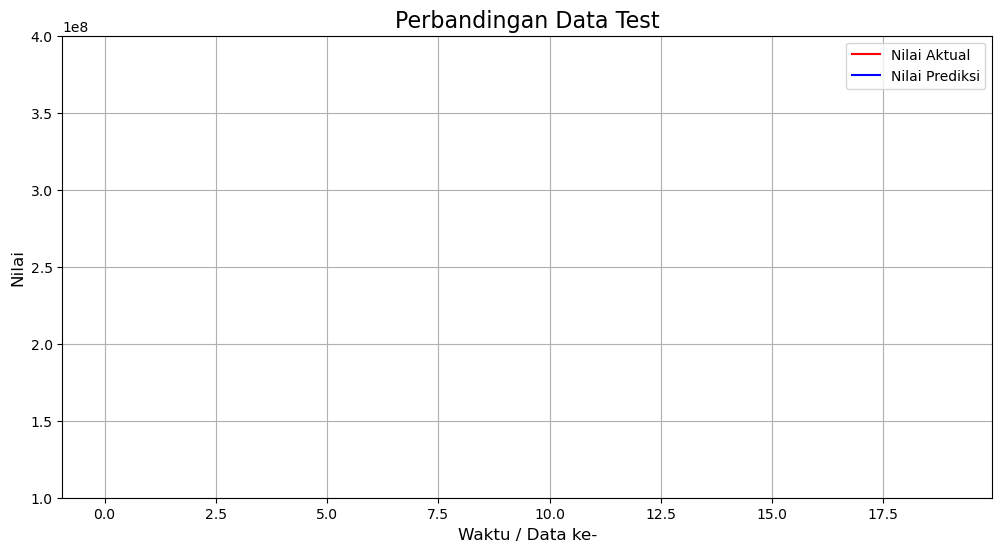

In [ ]:
# 1. Membuat kanvas dan mengatur ukuran
plt.figure(figsize=(12, 6))

# 2. Plot nilai aktual (merah)
plt.plot(range(len(y_true)), y_true, label='Nilai Aktual', color='red')

# 3. Plot nilai prediksi (biru)
plt.plot(range(len(y_pred)), y_pred, label='Nilai Prediksi', color='blue')
plt.ylim(100000000, 400000000)


# 4. Menambahkan judul dan label
plt.title('Perbandingan Data Test', fontsize=16)
plt.xlabel('Waktu / Data ke-', fontsize=12)
plt.ylabel('Nilai', fontsize=12)
plt.legend()
plt.grid(True)

# 5. Tampilkan plot
plt.show()

In [ ]:
# 1. Membuat kanvas dan mengatur ukuran
plt.figure(figsize=(12, 6))

# 2. Plot nilai aktual (merah)
plt.plot(range(len(df_prophet)), df_prophet['y'], label='Nilai Aktual', color='red')

# 3. Plot nilai prediksi (biru)
plt.plot(range(len(yhat_full)), yhat_full, label='Nilai Prediksi', color='blue')


# 4. Menambahkan judul dan label
plt.title('Perbandingan Nilai Aktual - Prediksi (Prophet + SVR)', fontsize=16)
plt.xlabel('Waktu / Data ke-', fontsize=12)
plt.ylabel('Nilai', fontsize=12)
plt.legend()
plt.grid(True)

# 5. Tampilkan plot
plt.show()

NameError: name 'df_prophet' is not defined

<Figure size 1200x600 with 0 Axes>

In [ ]:
end_time = time.time()
total_runtime = end_time - start_time

print(f"Total waktu eksekusi: {total_runtime:.4f} detik")

Total waktu eksekusi: 5.4728 detik
